In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
import pickle
from pathlib import Path

from object_detection import plot_bounding_box

In [4]:
root_dir = Path('/Users/deepakduggirala/Documents/ELPephant/images')

In [5]:
images = sorted([f for f in root_dir.iterdir() if f.suffix == '.jpg'])
json_file = 'german_dataset_inference_simple_resize.pickle'

In [6]:
with open(json_file, 'rb') as f:
    inference_data = pickle.load(f)

In [7]:
boxes, scores, classes, valid_detections = inference_data['boxes'], inference_data['scores'], inference_data['classes'], inference_data['valid_detections']

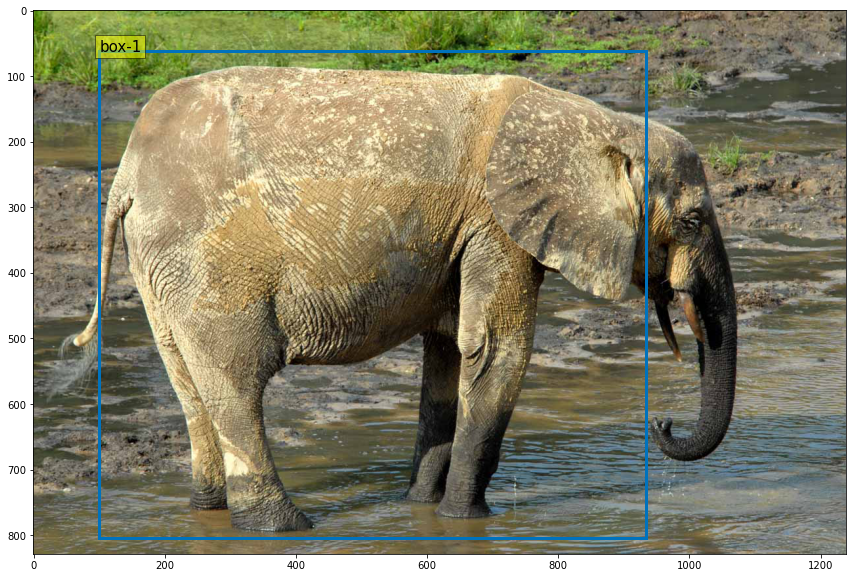

In [34]:
i=4
img = plt.imread(images[i])
plot_bounding_box(img, boxes[i, 0].reshape(1,-1), None, True)

In [39]:
H, W = img.shape[:2]
xmin, ymin, xmax, ymax = boxes[i, 0] * [W, H, W, H]
xc, yc = (xmin + xmax)/2, (ymin + ymax)/2
xc, yc

(516.7683788537979, 433.3965787291527)

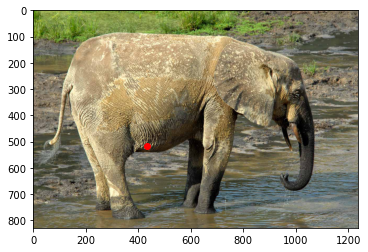

In [40]:
plt.plot(yc, xc, 'ro')
plt.imshow(img)

In [17]:
def scale_box(box, scale):
    x1, y1, x2, y2 = box
    w,h = x2-x1, y2-y1
    xc, yc = (x1+x2)/2, (y1+y2)/2
    
    new_w, new_h = w*scale, h*scale
    
    return np.array((
        max(0,xc-new_w/2), 
        max(0, yc-new_h/2), 
        min(1,xc+new_w/2), 
        min(1, yc + new_h/2))
    )

In [18]:
def get_largest_box(bxs):
    largest_box_i = np.argsort((bxs[:, 2] - bxs[:, 0]) * (bxs[:, 3] - bxs[:, 1]))[-1]
    return bxs[largest_box_i]

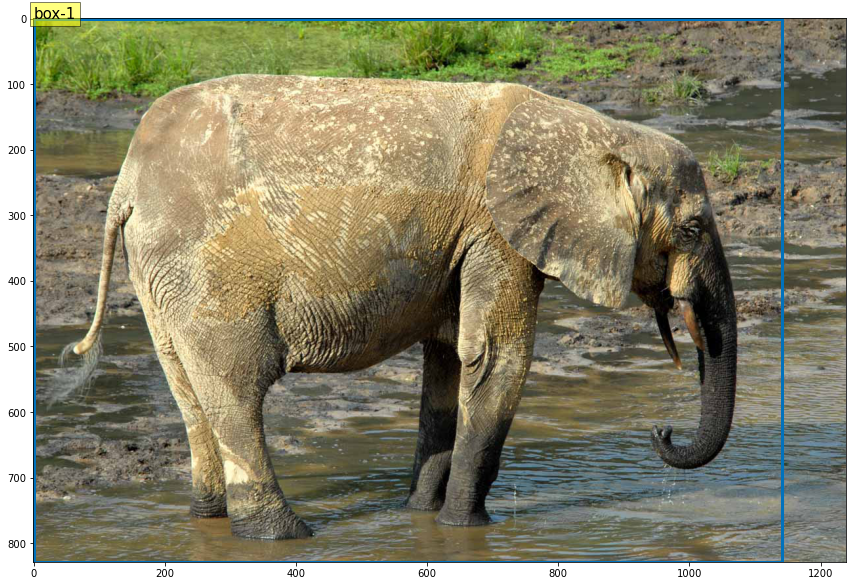

In [21]:
plot_bounding_box(img, scale_box(boxes[i, 0], 1.5).reshape(1,-1), None, True)

In [22]:
img = cv2.imread(str(images[i]))
w=640
img_r = cv2.resize(img, (w, int(w*(img.shape[0]/img.shape[1]))), interpolation = cv2.INTER_AREA)

In [29]:
H, W = img_r.shape[:2]
x1,y1,x2,y2 = scale_box(boxes[i,0].flatten(), 1) * [W, H, W, H]
rect =list(np.array((x1, y1, x2-x1, y2-y1), dtype=np.int32))
rect

[51, 31, 430, 383]

In [30]:
mask = np.zeros(img_r.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [31]:
_ = cv2.grabCut(img_r,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

In [32]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2 = img_r*mask2[:,:,np.newaxis]

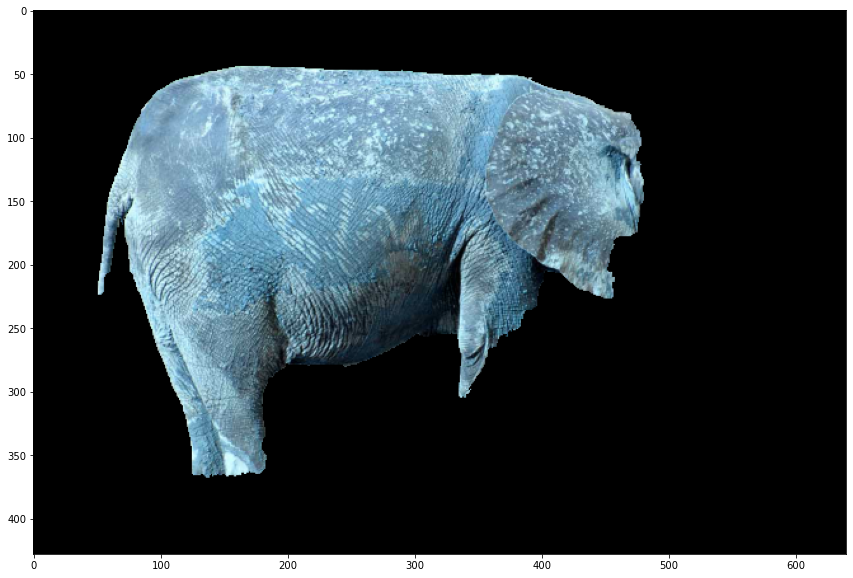

In [33]:
plt.figure(figsize=(16, 10))
plt.imshow(img2)